In [37]:
#manipulação de dados
import pandas as pd
import numpy as np

#graficos
import matplotlib.pyplot as plt
import seaborn as sns

#modelagem
from sklearn.linear_model import LogisticRegression

#metricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Aparentemente nenhum valor nulo na base**

In [5]:
frequencia = df.groupby('Outcome')['Age'].count().reset_index()
frequencia = frequencia.rename(columns = {'Outcome':'Diabetes','Age': 'Frequencia'})
frequencia['Diabetes'] = np.where(frequencia['Diabetes'] == 1,'Sim','Não')
frequencia['Frequencia Relativa'] = (frequencia['Frequencia']/frequencia['Frequencia'].sum()).round(2)*100
frequencia

,Diabetes,Frequencia,Frequencia Relativa
0,Não,500,65.0
1,Sim,268,35.0


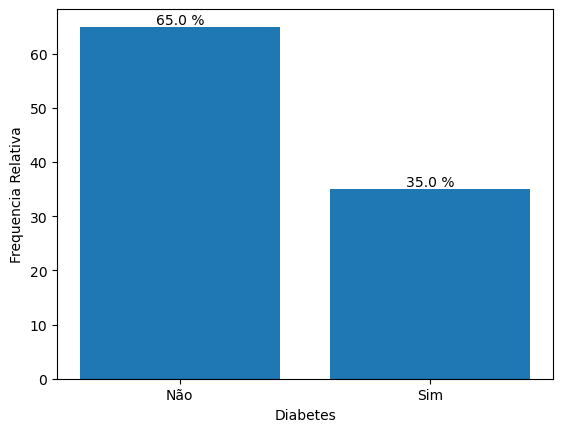

In [6]:
plt.bar(frequencia['Diabetes'], frequencia['Frequencia Relativa'])
plt.xlabel('Diabetes')
plt.ylabel('Frequencia Relativa')

for i,freq in enumerate(frequencia['Frequencia Relativa']):
    plt.text(i, freq, f'{str(freq)} %', ha = 'center', va='bottom')

plt.show()

**Em uma amostra de 768 pacientes menos da metade dos pacientes, 35%, tem diabetes!!**

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Vemos algumas valores 0 como em Glucose e BloodPressure, pode ser algo estranho, talvez tenham imputado errado os valores**

In [8]:
for col in df.columns:
    print(col+":\t",(df[col]==0).sum(), "missings")

Pregnancies:	 111 missings
Glucose:	 5 missings
BloodPressure:	 35 missings
SkinThickness:	 227 missings
Insulin:	 374 missings
BMI:	 11 missings
DiabetesPedigreeFunction:	 0 missings
Age:	 0 missings
Outcome:	 500 missings


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


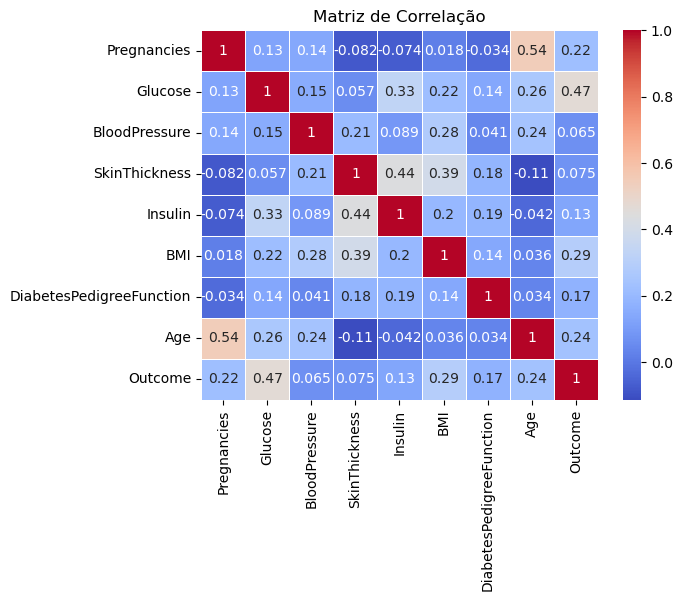

In [10]:
sns.heatmap(df.corr(), annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

**Pouca correlação entre as variáveis. É provavel que o modelo não sofra com problemas de multicolinearidade**

## Ajuste do modelo de Regressão Logistica

In [11]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [12]:
modelo = LogisticRegression(fit_intercept=True, random_state=42, max_iter=500)
modelo.fit(x,y)

LogisticRegression(max_iter=500, random_state=42)

In [14]:
df2 = df.copy()
df2['Prob'] = modelo.predict_proba(x)[:,1]
df2['Diabete_Predito'] = modelo.predict(x)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prob,Diabete_Predito
0,6,148,72,35,0,33.6,0.627,50,1,0.719492,1
1,1,85,66,29,0,26.6,0.351,31,0,0.049287,0
2,8,183,64,0,0,23.3,0.672,32,1,0.792585,1
3,1,89,66,23,94,28.1,0.167,21,0,0.042725,0
4,0,137,40,35,168,43.1,2.288,33,1,0.889648,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.323806,0
764,2,122,70,27,0,36.8,0.340,27,0,0.321327,0
765,5,121,72,23,112,26.2,0.245,30,0,0.173031,0
766,1,126,60,0,0,30.1,0.349,47,1,0.286761,0


## Métricas de performance

### Matriz de confusão

In [16]:
# Pacote que cria a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
cm = confusion_matrix(df2['Outcome'], df2['Diabete_Predito'])

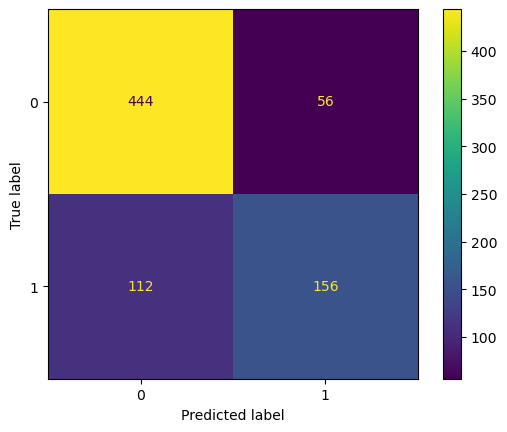

In [19]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

### curva roc

In [24]:
fpr, tpr, thresholds = roc_curve(df2['Outcome'], df2['Prob'])

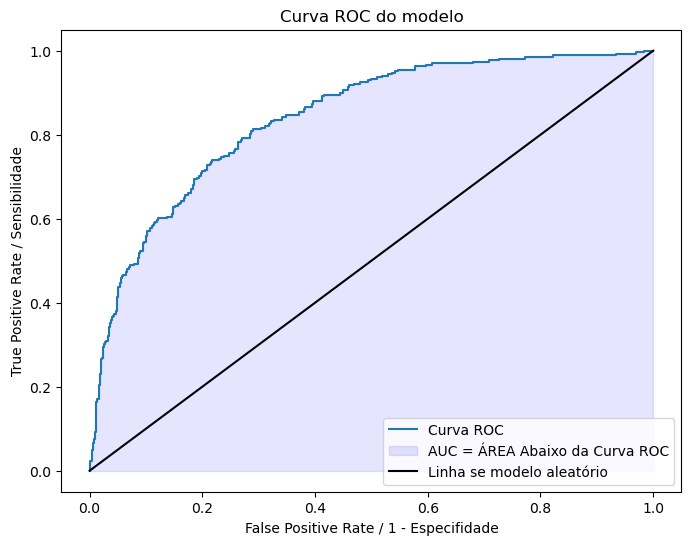

In [29]:
plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label='Curva ROC')
plt.fill_between(fpr,tpr,color='blue', alpha = 0.1, label='AUC = ÁREA Abaixo da Curva ROC')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='black', label='Linha se modelo aleatório')

plt.title("Curva ROC do modelo")
plt.ylabel('True Positive Rate / Sensibilidade')
plt.xlabel('False Positive Rate / 1 - Especifidade')
plt.legend()

plt.show()

### Calculo do AUC

In [32]:
# Calcula a área abaixo da curva ROC
print('O AUC é: ', roc_auc_score(df2['Outcome'], df2['Prob']))

O AUC é:  0.8390746268656715


In [36]:
# Prob (Y=0) quando o Y Real for igual a 0
prob_y_real_0 = df2.loc[df2.Outcome==0, "Prob"]

# Prob (Y=1) quando o Y Real for igual a 1
prob_y_real_1 = df2.loc[df2.Outcome==1, "Prob"]

print("O KS é: ", stats.ks_2samp(prob_y_real_0, prob_y_real_1).statistic)

O KS é:  0.5237014925373135


### Precisão, Sensibilidade/Recall, Especificidade e F1-score

Em um problema de classificação binária como este, a especificidade também aparece no Classification Report para Recall = 0. No caso, a especificidade é 0,888 ~ 0,89.

In [40]:
print(classification_report(df2['Outcome'], df2['Diabete_Predito']))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



Para o corte padrão de probabilidade 0,5, interpretamos:

-**Precisão:** 0,74 >> De todos os pacientes que o modelo classificou como diabéticos, 74% realmente estavam diabeticos.<br>
-**Sensibilidade/Recall:** 0,58 >> De todos os pacientes que realmente estavam diabeticos, o modelo classificou como diabéticos apenas 58%.<br>
-**Especificidade:** 0,89 >> De todos os pacientes que **não** estavam diabétivos, o modelo classificou como não diabéticos 89%.<br>

#### Qual a métrica prioritária para o problema ? Ou seja, queremos diminuir falsos positivos ou falsos negativos? Além disso, qual o corte de probabilidade que minimiza esse erro?

Ao usar esse modelo para definir se um paciente tem diabete, precisamos diminuir a quantidade de falsos negativos com maior prioridade, pois é mais perigoso não diagnosticar um paciente que realmente tem diabetes do que dizer que alguém que não tenha diabetes deva fazer um tratamento de diminuição de açúcar ou melhora da capacidade física.

Portanto, para diminuir os falsos negativos, **precisamos de modelos com melhores sensibilidades (recall)**

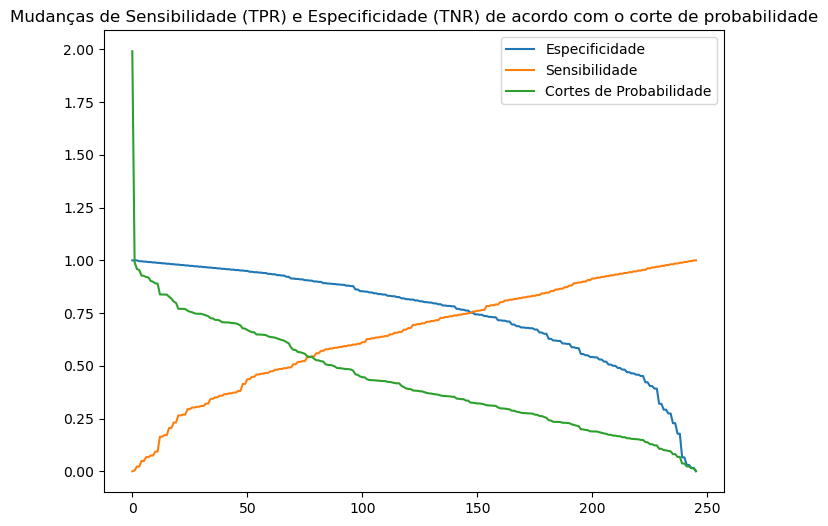

In [41]:
plt.figure(figsize=(8,6))

plt.plot(1-fpr, label='Especificidade')
plt.plot(tpr, label='Sensibilidade')
plt.plot(thresholds, label='Cortes de Probabilidade')

plt.legend()
plt.title('Mudanças de Sensibilidade (TPR) e Especificidade (TNR) de acordo com o corte de probabilidade')
plt.show()

**Pelo gráfico acima, talvez um valor de corte superior a 0,25 pode aumentar a Sensibilidade sem perder tanta Especificidade**

In [42]:
df3 = df2.copy()
df3['Diabete_Predito'] = np.where(df3['Prob']>0.25,1,0)

In [45]:
cm2 = confusion_matrix(df3['Outcome'], df3['Diabete_Predito'])

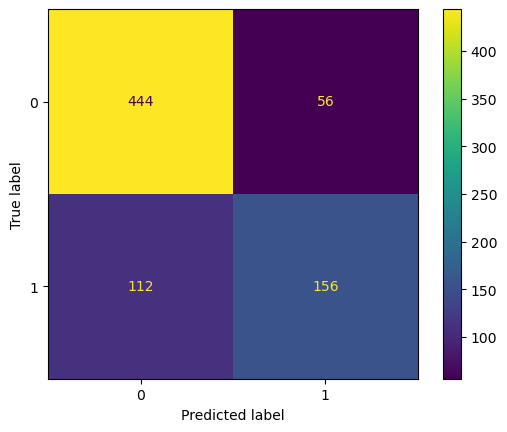

In [50]:
# Matriz Com Corte > 0.5 (Padrão)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

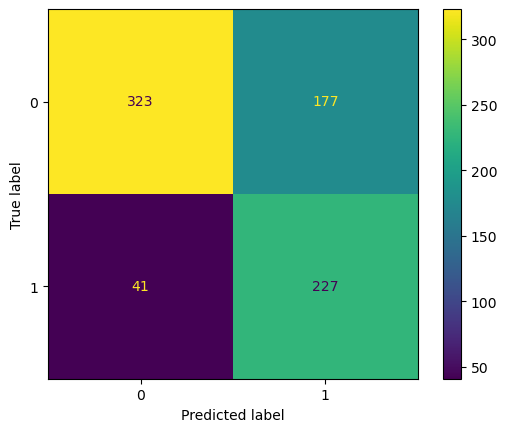

In [53]:
# Matriz Com Corte > 0.25 (Após a mudança para melhorar a sensibilidade)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot();

**Perceba quanto a quantidade de Falsos Negativos diminuiu**

In [54]:
print(classification_report(df3['Outcome'],df3['Diabete_Predito']))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       500
           1       0.56      0.85      0.68       268

    accuracy                           0.72       768
   macro avg       0.72      0.75      0.71       768
weighted avg       0.77      0.72      0.72       768



**Veja também que a Sensibilidade aumentou de 58% para 85%**